In [1]:
from pprint import pprint

from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from pandas.plotting import lag_plot

import os; import sys;

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.utils_fancy_example.utils_fancy_example import *
from utils.utils_fancy_example.utils_computation_fancy_example import *
from utils.utils_fancy_example.utils_plot_fancy_example import *
from utils.utils_fancy_example.utils_ml_fancy_example import *
from utils.utils_fancy_example.utils_fancy_example_df_plots import *
from utils.sklearn_tests_plot import *


In [2]:
np.random.seed(0)

T = 8
N_MIN, N_MAX = 8, 200
TARGET = 't'

In [3]:
DIR_IMAGES = 'images'
DIR_NOTEBOOK_IMG = 'fancy_example'
dest_dir_images = os.path.join(DIR_IMAGES, DIR_NOTEBOOK_IMG)

setup_dir_for_images(dest_dir_images)

full_path_trial = os.path.join(dest_dir_images, f"trial_{N_MIN}_to_{N_MAX}")
setup_dir_for_images(dest_dir_images)

## Rough Explanation

In [4]:
raw_examples()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

In [5]:
raw_examples_v2()

{'a': 4, 'b': 4, 'x': 5.0, 'y': 3.0, 't': 8}

## Structural Expalnation

In [6]:
solve_problem(t=T, verbose=2, whole_solutions=False)

[2 4 6] <class 'numpy.ndarray'>
[2 4 6] <class 'numpy.ndarray'>
[4]
4 2 [4. 2.] 6.0
4 4 [5. 3.] 8.0
append [array([4, 4]), array([5., 3.]), 8]
4 6 [6. 4.] 10.0


array([[array([4, 4]), array([5., 3.]), 8]], dtype=object)

## Structural Simulation

In [7]:
t_attempts, results = solve_problem_v2(t_min=N_MIN, t_max=N_MAX, verbose=0, whole_solutions=False)

In [8]:
instances_x_result = np.array(list(map(lambda xi: len(xi), results)))
x, y = np.array(list(t_attempts)), instances_x_result
# x, y = np.array(t_attempts), instances_x_result

### Plots Structural Simulation

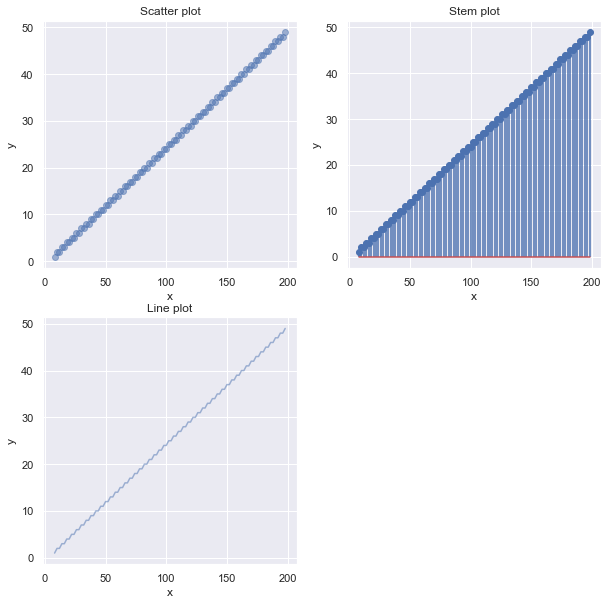

In [9]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

## Data Frame Analysis Section

In [10]:
df = create_data_frame(raw_data=results)

In [11]:
# df.head(df.shape[0])
df.head(5)

,x,y,a,b,t
0,5.0,3.0,4.0,4.0,8.0
1,7.0,3.0,8.0,2.0,10.0
2,6.0,4.0,4.0,6.0,10.0
3,8.0,4.0,8.0,4.0,12.0
4,7.0,5.0,4.0,8.0,12.0


### __Show difference between 'x' and 'y' features__

In [12]:
n_samples = df.shape[0]
x_vals = df.head(n_samples)[['x']].values
y_vals = df.head(n_samples)[['y']].values

In [13]:
diffs_x_y = x_vals - y_vals
x, y = list(range(len(diffs_x_y))), diffs_x_y

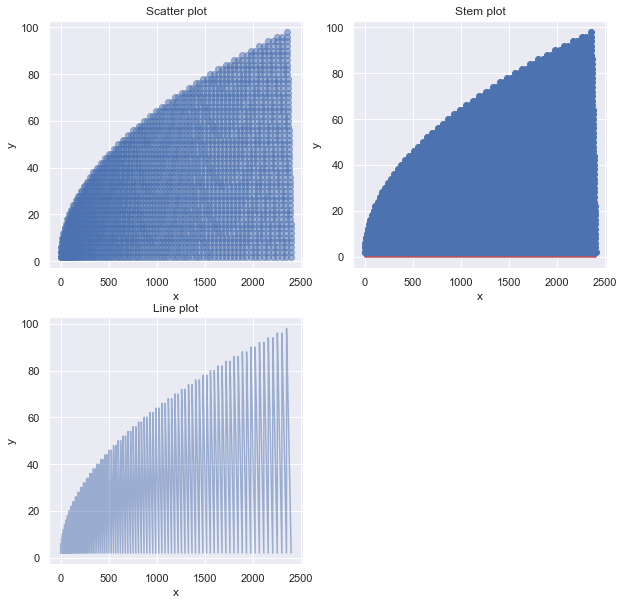

In [14]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

### __Show difference between 'a' and 'b' features__

In [15]:
n_samples = df.shape[0]
a_vals = df.head(n_samples)[['a']].values
b_vals = df.head(n_samples)[['b']].values

In [16]:
diffs_a_b = a_vals - b_vals
x, y = list(range(len(diffs_a_b))), diffs_a_b

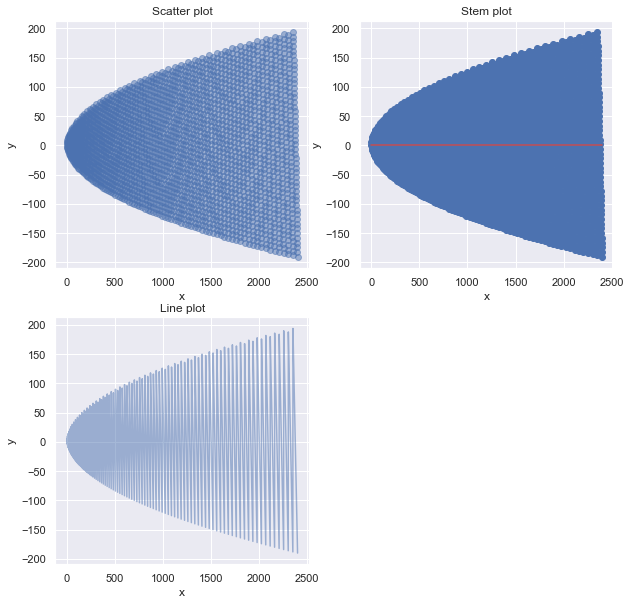

In [17]:
plot_stem_line_scatter(x, y, gridshape=[2, 2], figsize=(10, 10))

### Basis df plots

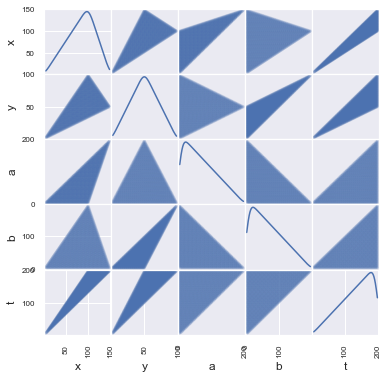

In [18]:
_ = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

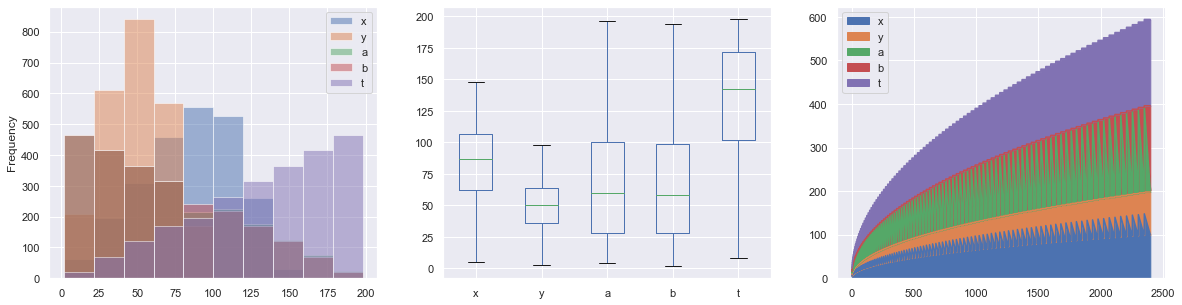

In [19]:
show_basis_df_plots(df, target_name=TARGET, gridshape=(1, 3), figsize=(20, 5))

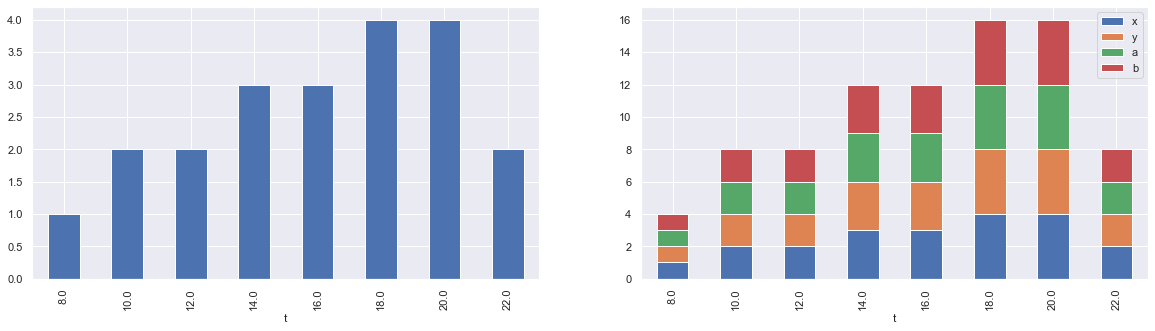

In [20]:
show_df_bars(df, target_name=TARGET, n_elements=20, gridshape=(1, 2), figsize=(20, 5))

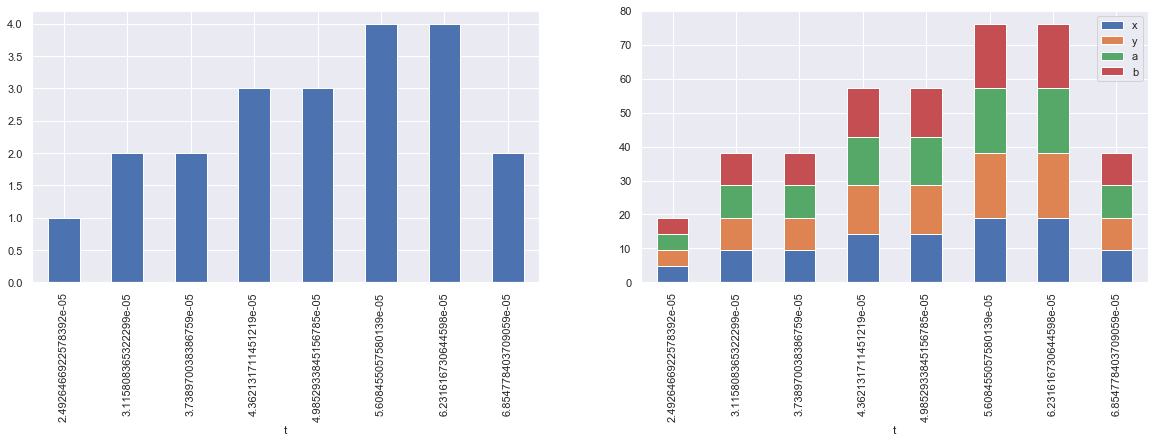

In [21]:
show_df_bars_scaled(df, target_name=TARGET, n_elements=20, gridshape=(1, 2), figsize=(20, 5), axis=0)

In [22]:
df.loc[:20, [TARGET, 'x']].groupby([TARGET]).groups.keys()

dict_keys([8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0])

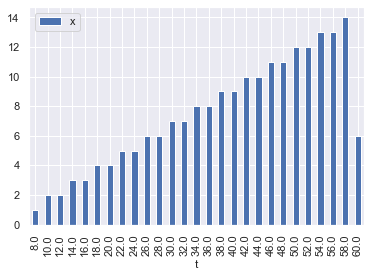

In [23]:
stacked_data = df.loc[:200, [TARGET, 'x']].groupby([TARGET]).count()
stacked_data.plot(kind="bar", stacked=True)

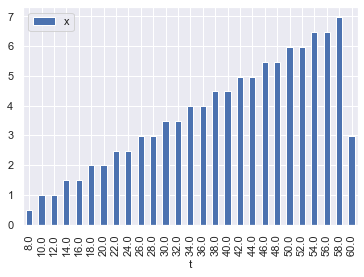

In [24]:
stacked_data = df.loc[:200, [TARGET, 'x']].groupby([TARGET]).count().apply(lambda x: x*100/sum(x), axis=0)
stacked_data.plot(kind="bar", stacked=True)

## Machine Learning Section

In [25]:
X = df.loc[:, df.columns != TARGET].values
y = df[[TARGET]].values

In [26]:
# show_Ordinary_Least_Squares_vs_Ridge_Regression_Variance(X[:, 0], y)

## References

### Pandas - References
- Visualization:
    - (visualization) https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Blogs:
- (Chris Albon) https://chrisalbon.com/#machine_learning
- (Shane Lynn) https://www.shanelynn.ie/